In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE,RandomOverSampler 

#will use random forest to compare
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#will use svm rbf to compare as well
from sklearn.pipeline import Pipeline
from sklearn import svm, metrics

In [2]:
#getting data & splitting into training and testing sets
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# _s endings mean that they are datasets that have smote over sampling
smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

ros = RandomOverSampler(random_state=42)
X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()
    print("ACCURACY:        ", acc[-1], "\nVAL ACCURACY:    ", val[-1], "\nVAL LOSS:        ", loss_val[-1] )

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [4]:
#model_2 -> second version of model & data was fidded with no sampling techniques
# _s the model is fidded data that was oversampled using smote
# _r model is fidded with data that was RandomOverSampler
# _h model is fidded with oversampled data but the layers activation all relu
model_= keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_2_relu_actv = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A"),
        layers.Dense(10, activation="relu", name="layer_B"),
        layers.Dense(10, activation="relu", name="layer_C"),
        layers.Dense(5, activation="relu", name="layer_D"),
        layers.Dense(1, activation="relu")
    ]
) 

model_.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# compiling the models
model_2 = model_
model_2_smote = model_
model_2_rand = model_
model_2_relu_actv.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# setting up early stopping, monitering loss 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

In [5]:
#fiting the first NN
hist = model_2.fit(x_train,y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
228/228 [==============================] - 2s 3ms/step - loss: 0.4386 - accuracy: 0.8357 - val_loss: 0.3602 - val_accuracy: 0.8847
Epoch 2/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8817 - val_loss: 0.3581 - val_accuracy: 0.8847
Epoch 3/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8817 - val_loss: 0.3574 - val_accuracy: 0.8847
Epoch 4/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8817 - val_loss: 0.3582 - val_accuracy: 0.8847
Epoch 5/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8817 - val_loss: 0.3566 - val_accuracy: 0.8847
Epoch 6/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8817 - val_loss: 0.3566 - val_accuracy: 0.8847
Epoch 7/50
228/228 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8817 - val_loss: 0.3573 - val_accuracy: 0.8847
Epoch 

ACCURACY:         0.881844699382782 
VAL ACCURACY:     0.8848052620887756 
VAL LOSS:         0.3555610179901123


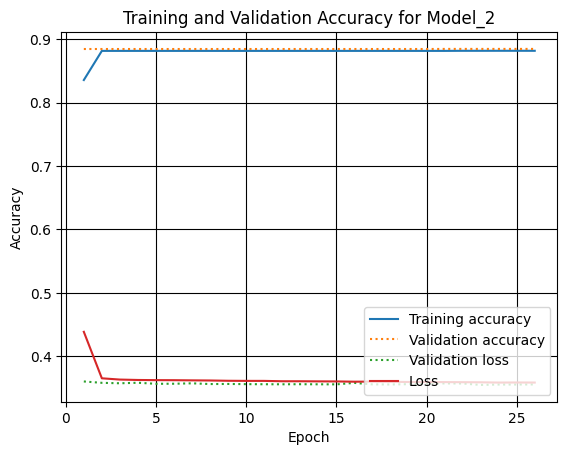

In [6]:
printGraph("Training and Validation Accuracy for Model_2", hist)

228/228 [==============================] - 0s 1ms/step


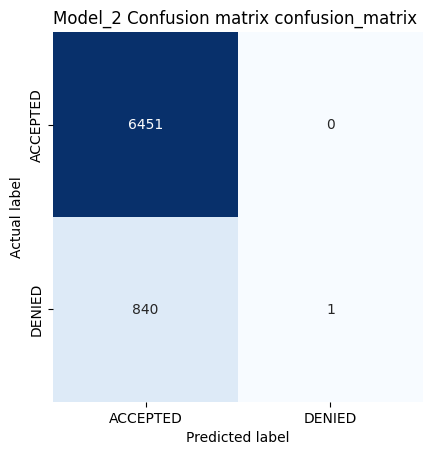

In [7]:
printConfusionMatrix(model_2, x_test, y_test, name="Model_2 Confusion matrix")

In [8]:
# the model is fidded data that was oversampled using smote
hist_s = model_2_smote.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5357 - val_loss: 0.6690 - val_accuracy: 0.6894
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.5580 - val_loss: 0.7264 - val_accuracy: 0.4117
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6751 - accuracy: 0.5693 - val_loss: 0.7011 - val_accuracy: 0.5182
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6724 - accuracy: 0.5758 - val_loss: 0.6623 - val_accuracy: 0.6421
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6704 - accuracy: 0.5768 - val_loss: 0.6872 - val_accuracy: 0.5804
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.5792 - val_loss: 0.6921 - val_accuracy: 0.5315
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6663 - accuracy: 0.5822 - val_loss: 0.6933 - val_accuracy: 0.5586

ACCURACY:         0.6122885346412659 
VAL ACCURACY:     0.5085024833679199 
VAL LOSS:         0.7000212073326111


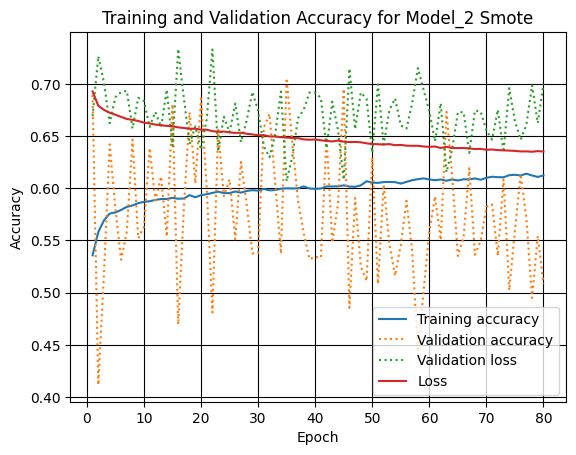

In [9]:
printGraph("Training and Validation Accuracy for Model_2 Smote", hist_s)

228/228 [==============================] - 0s 2ms/step


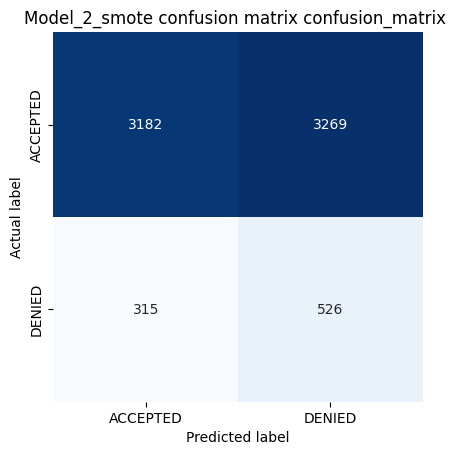

In [10]:
printConfusionMatrix(model_2_smote, x_test, y_test, name="Model_2_smote confusion matrix")

In [11]:
# model is fidded with data that was RandomOverSampler
hist_r = model_2_rand.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6552 - accuracy: 0.5919 - val_loss: 0.6551 - val_accuracy: 0.5749
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.5947 - val_loss: 0.6621 - val_accuracy: 0.5624
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6513 - accuracy: 0.5941 - val_loss: 0.6767 - val_accuracy: 0.5550
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6513 - accuracy: 0.5970 - val_loss: 0.6790 - val_accuracy: 0.5499
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6503 - accuracy: 0.5981 - val_loss: 0.6496 - val_accuracy: 0.6459
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6502 - accuracy: 0.5996 - val_loss: 0.6202 - val_accuracy: 0.7086
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6504 - accuracy: 0.5961 - val_loss: 0.6476 - val_accuracy: 0.6620

ACCURACY:         0.6020221710205078 
VAL ACCURACY:     0.6124520301818848 
VAL LOSS:         0.6604334115982056


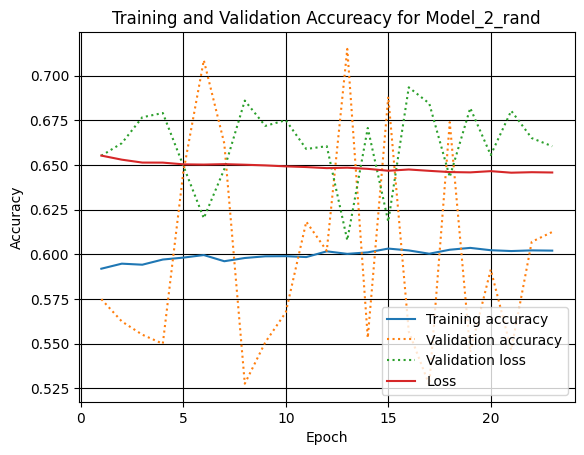

In [12]:
printGraph("Training and Validation Accureacy for Model_2_rand", hist_r)

228/228 [==============================] - 0s 1ms/step


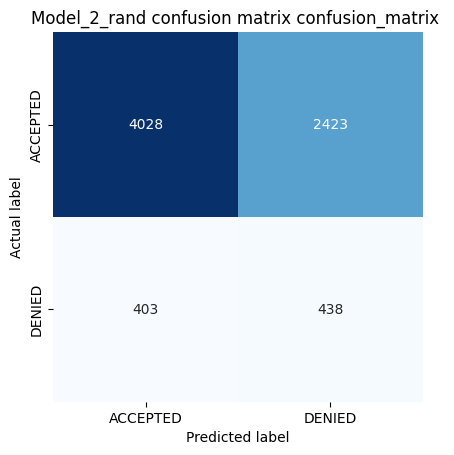

In [13]:
printConfusionMatrix(model_2_rand, x_test,y_test,name="Model_2_rand confusion matrix")

In [14]:
# model is fidded with oversampled data but the layers activation all relu
model_2_relu_actv_smote = model_2_relu_actv
hist_h = model_2_relu_actv.fit(X_train_r,y_train_r, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 2s 2ms/step - loss: 0.7862 - accuracy: 0.5081 - val_loss: 0.6375 - val_accuracy: 0.7356
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5239 - val_loss: 0.6346 - val_accuracy: 0.7393
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5384 - val_loss: 0.6811 - val_accuracy: 0.5621
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5453 - val_loss: 0.6250 - val_accuracy: 0.7538
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.5492 - val_loss: 0.7026 - val_accuracy: 0.4868
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.5496 - val_loss: 0.6555 - val_accuracy: 0.6439
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6831 - accuracy: 0.5528 - val_loss: 0.6219 - val_accuracy: 0.7238

ACCURACY:         0.559012234210968 
VAL ACCURACY:     0.4403455853462219 
VAL LOSS:         0.7091470956802368


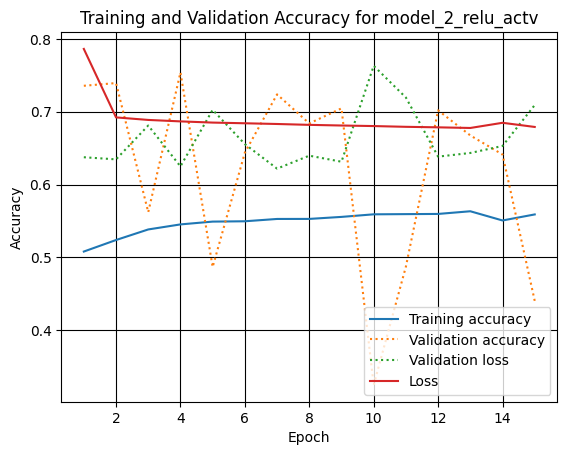

In [15]:
printGraph("Training and Validation Accuracy for model_2_relu_actv", hist_h)

228/228 [==============================] - 0s 1ms/step


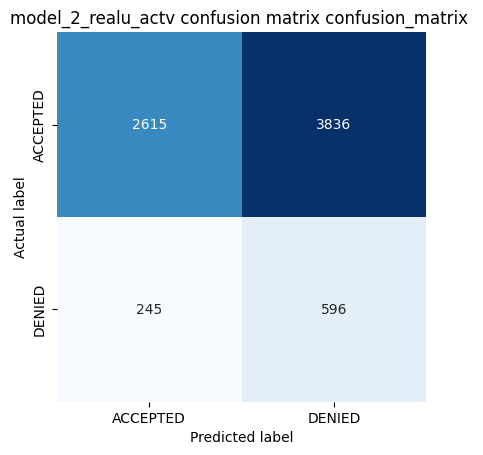

In [16]:
printConfusionMatrix(model_2_relu_actv, x_test, y_test, name="model_2_realu_actv confusion matrix")

In [17]:
# model is fidded with oversampled data but the layers activation all relu
hist_h = model_2_relu_actv_smote.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.5652 - val_loss: 0.6974 - val_accuracy: 0.5235
Epoch 2/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.5715 - val_loss: 0.6389 - val_accuracy: 0.6663
Epoch 3/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.5738 - val_loss: 0.6594 - val_accuracy: 0.6569
Epoch 4/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.5757 - val_loss: 0.7057 - val_accuracy: 0.4989
Epoch 5/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6682 - accuracy: 0.5772 - val_loss: 0.6630 - val_accuracy: 0.5865
Epoch 6/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.5760 - val_loss: 0.6860 - val_accuracy: 0.5291
Epoch 7/100
402/402 [==============================] - 1s 2ms/step - loss: 0.6665 - accuracy: 0.5796 - val_loss: 0.6717 - val_accuracy: 0.5601

ACCURACY:         0.5841338038444519 
VAL ACCURACY:     0.5783050060272217 
VAL LOSS:         0.653756320476532


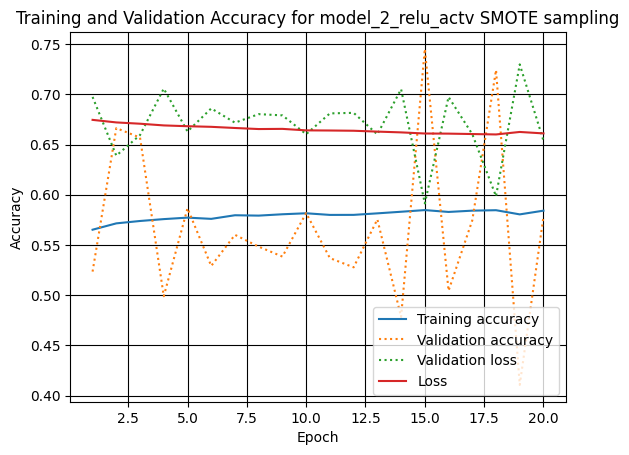

In [18]:
printGraph("Training and Validation Accuracy for model_2_relu_actv SMOTE sampling", hist_h)

228/228 [==============================] - 0s 1ms/step


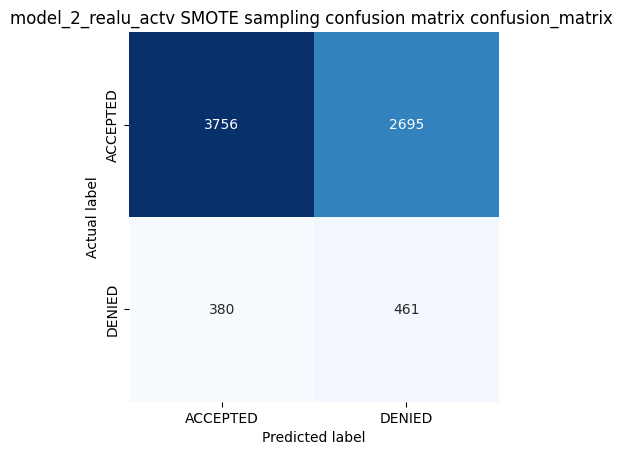

In [19]:
printConfusionMatrix(model_2_relu_actv_smote, x_test, y_test, name="model_2_realu_actv SMOTE sampling confusion matrix")

Accuracy Score is 0.88481
      0  1
0  6451  0
1   840  1


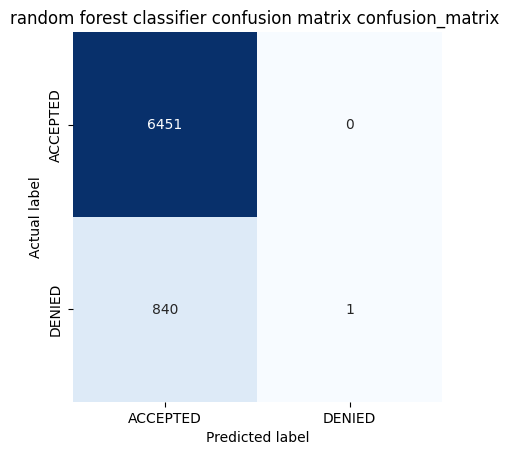

In [20]:
#random forest classifier
model_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with no oversampling
model_forest.fit(x_train, y_train)
y_predict = model_forest.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest, x_test, y_test, name="random forest classifier confusion matrix")

Accuracy Score is 0.78662
      0     1
0  5429  1022
1   534   307


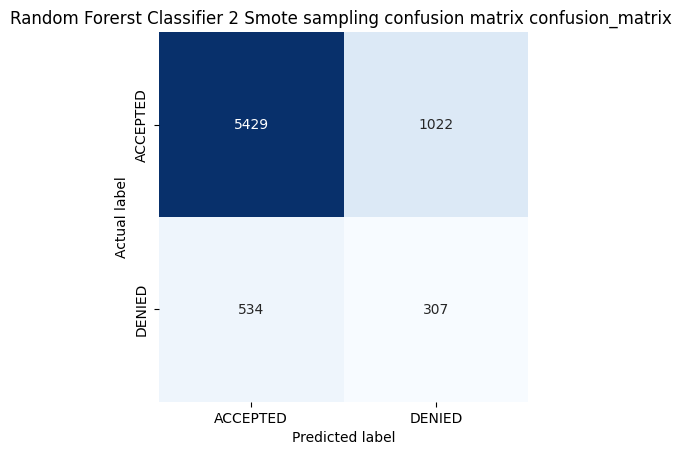

In [21]:
model_forest_smote = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using smote
model_forest_smote.fit(x_train_s, y_train_s)
y_predict = model_forest_smote.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest_smote, x_test,y_test,name="Random Forerst Classifier 2 Smote sampling confusion matrix")

Accuracy Score is 0.76947
      0     1
0  5200  1251
1   430   411


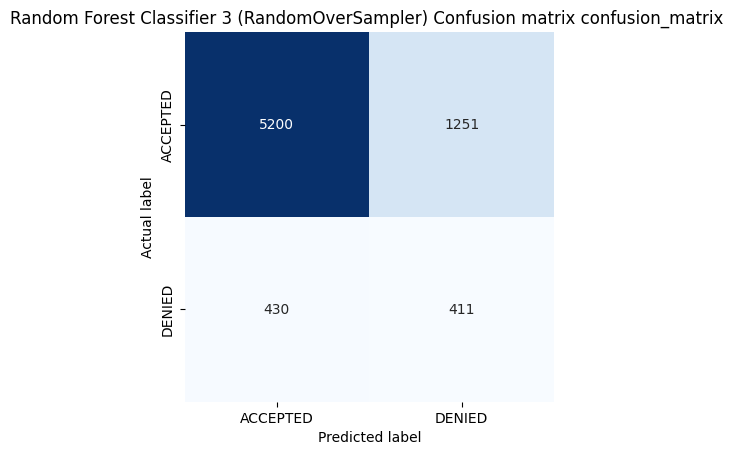

In [22]:
model_forest_over = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
#fidding data with oversampled data using RandomOverSampler
model_forest_over.fit(X_train_r, y_train_r)
y_predict = model_forest_over.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(p.DataFrame(confusion_matrix(y_test,y_predict)))

printConfusionMatrix(model_forest_over, x_test,y_test,name="Random Forest Classifier 3 (RandomOverSampler) Confusion matrix") 

In [23]:
#building the svm RBF and fidding it with data that has been oversampled using smote

rbf_svm_clf = svm.SVC(kernel="rbf", gamma="auto", C=2, decision_function_shape='ovr')

rbf_svm_clf.fit(x_train_s,y_train_s)

SVC(C=2, gamma='auto')

Classification report for classifier [0 0 0 ... 1 1 1]:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      6451
           1       0.14      0.51      0.22       841

    accuracy                           0.59      7292
   macro avg       0.52      0.56      0.47      7292
weighted avg       0.82      0.59      0.66      7292




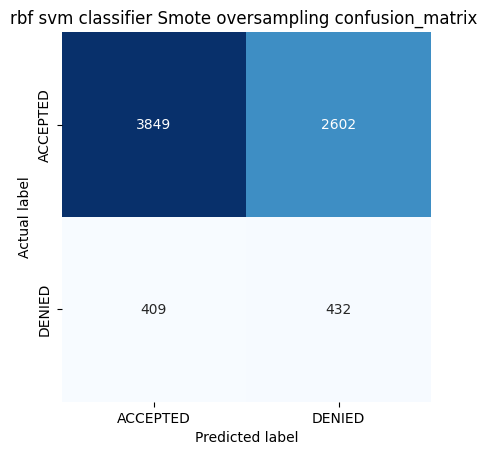

In [24]:
printConfusionMatrix(rbf_svm_clf, x_test,y_test,name="rbf svm classifier Smote oversampling")

predicted_rbf = rbf_svm_clf.predict(x_test)

#disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_rbf)
#disp.figure_.suptitle("Confusion Matrix for SVM rbf classifier")
print(
    f"Classification report for classifier {predicted_rbf}:\n"
    f"{metrics.classification_report(y_test, predicted_rbf)}\n"
)

In [25]:
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_A (Dense)             (None, 22)                264       
                                                                 
 layer_B (Dense)             (None, 10)                230       
                                                                 
 layer_C (Dense)             (None, 10)                110       
                                                                 
 layer_D (Dense)             (None, 5)                 55        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_2_relu_actv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_A (Dense)             (None, 22)                264       
                                                                 
 layer_B (Dense)             (None, 10)                230       
                                                                 
 layer_C (Dense)             (None, 10)                110       
                                                                 
 layer_D (Dense)             (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________
